<a href="https://colab.research.google.com/github/Alfaturachman/travelling-salesman-problem/blob/main/Traveling_Salesman_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libary**

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

**Load Dataset**

In [3]:
# Membaca data lokasi dari file Excel
df = pd.read_excel('data_lokasi.xlsx')
df.head()

,Name,Latitude,Longitude
0,Pengelola,-7.047922,110.297677
1,Toko Ban Surabaya Putra,-7.085865,110.309694
2,Davista Ban,-7.079101,110.308762
3,Tambal Ban Mas Hadi,-7.087787,110.362205
4,Tambal Ban Roda Jaya,-7.018282,110.338316


**Traveling Salesman Problem (TSP)**

In [4]:
# Haversine Formula untuk menghitung jarak
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius bumi dalam km
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Fungsi untuk menghasilkan matriks jarak
def calculate_distance_matrix(locations):
    n = len(locations)
    distance_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i][j] = haversine_distance(
                    locations[i]["Latitude"], locations[i]["Longitude"],
                    locations[j]["Latitude"], locations[j]["Longitude"]
                )
    return distance_matrix

# Algoritma Nearest Neighbor
def nearest_neighbor_tsp(distance_matrix):
    n = len(distance_matrix)
    visited = [False] * n
    tour = [0]  # Mulai dari titik awal (index 0)
    visited[0] = True
    total_distance = 0

    for _ in range(n - 1):
        current = tour[-1]
        nearest_distance = float("inf")
        nearest_neighbor = -1
        for i in range(n):
            if not visited[i] and distance_matrix[current][i] < nearest_distance:
                nearest_distance = distance_matrix[current][i]
                nearest_neighbor = i
        tour.append(nearest_neighbor)
        visited[nearest_neighbor] = True
        total_distance += nearest_distance

    # Kembali ke titik awal
    total_distance += distance_matrix[tour[-1]][tour[0]]
    tour.append(0)

    return tour, total_distance

# Mengonversi DataFrame ke format list of dictionaries
locations = df.to_dict(orient="records")

# Hitung matriks jarak
distance_matrix = calculate_distance_matrix(locations)

# Sebelum TSP
print("\nUrutan Lokasi Sebelum TSP:")
for location in locations:
    print(location["Name"])

# Setelah TSP
tour, total_distance = nearest_neighbor_tsp(distance_matrix)
print("\nUrutan Lokasi Setelah TSP:")
for index in tour:
    print(locations[index]["Name"])

print(f"\nTotal Jarak Setelah TSP: {total_distance:.2f} km")


Urutan Lokasi Sebelum TSP:
Pengelola
Toko Ban Surabaya Putra
Davista Ban
Tambal Ban Mas Hadi
Tambal Ban Roda Jaya
All Star Ban Motor
Ada Ban Sadeng
Dewa Ban
Hi-Bizz Ban & Oli
As Jaya Ban

Urutan Lokasi Setelah TSP:
Pengelola
Davista Ban
Toko Ban Surabaya Putra
Tambal Ban Mas Hadi
Dewa Ban
As Jaya Ban
Ada Ban Sadeng
All Star Ban Motor
Hi-Bizz Ban & Oli
Tambal Ban Roda Jaya
Pengelola

Total Jarak Setelah TSP: 28.87 km


**Hasil TSP**


Rute Sebelum TSP


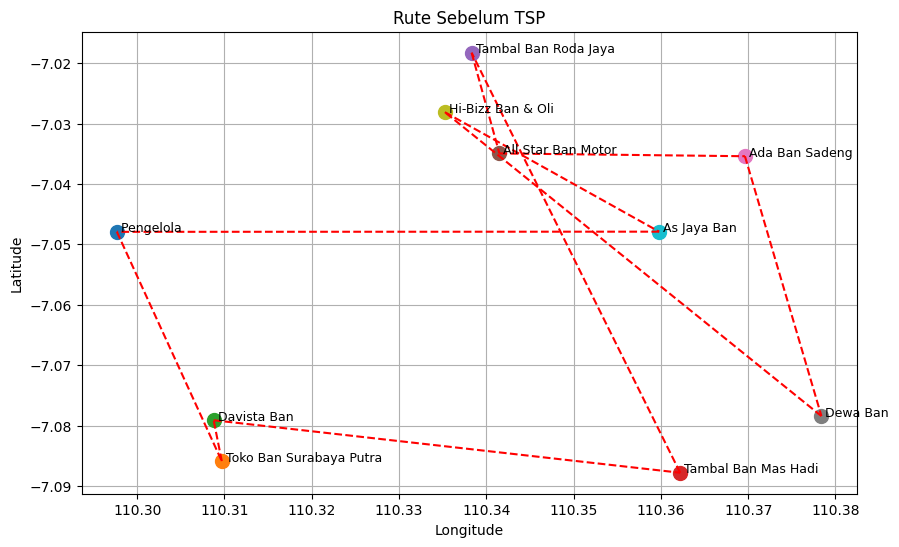


Rute Setelah TSP


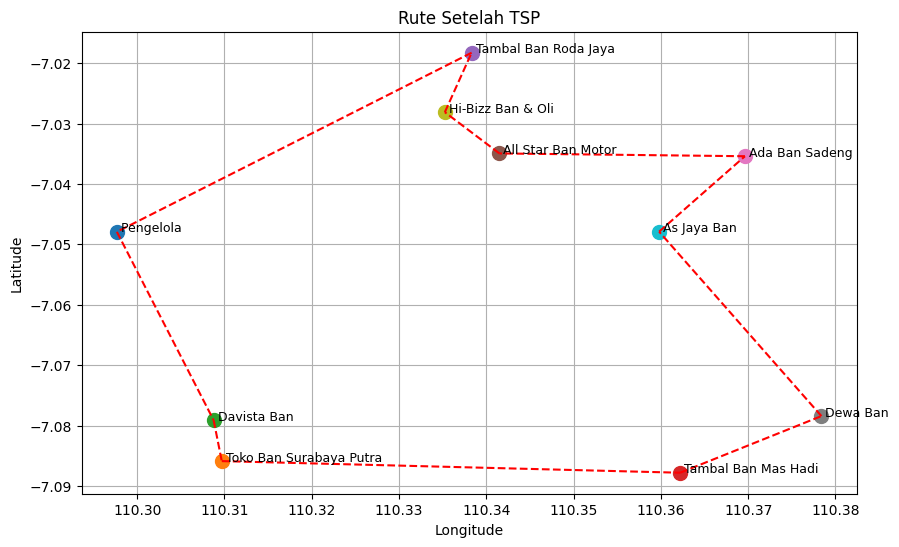

In [5]:
# Fungsi untuk memplot rute
def plot_route(locations, tour, title):
    plt.figure(figsize=(10, 6))

    # Plot lokasi
    for i, loc in enumerate(locations):
        plt.plot(loc["Longitude"], loc["Latitude"], 'o', markersize=10)
        plt.text(loc["Longitude"], loc["Latitude"], f" {loc['Name']}", fontsize=9)

    # Plot garis rute
    for i in range(len(tour) - 1):
        start = locations[tour[i]]
        end = locations[tour[i + 1]]
        plt.plot([start["Longitude"], end["Longitude"]], [start["Latitude"], end["Latitude"]], 'r--')

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()

# Visualisasi sebelum TSP
plot_route(locations, list(range(len(locations))) + [0], "Rute Sebelum TSP")

# Visualisasi setelah TSP
plot_route(locations, tour, "Rute Setelah TSP")
